# Imports

In [196]:
import numpy as np 
import matplotlib.pyplot as plt

# Problem 1 

In [197]:
X = np.array([[0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5],
              [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]])
Y = np.array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

In [198]:
# Define network parameters
input_size = 2
output_size = 2
hidden_units = 10
learning_rate = 0.5
num_epochs = 100

In [199]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [200]:
# Training loop

def train(num_epochs):
    # Initialize weights and biases
    np.random.seed(0)
    w_hidden = np.random.rand(hidden_units, input_size)
    b_hidden = np.random.rand(hidden_units, 1)
    w_output = np.random.rand(output_size, hidden_units)
    b_output = np.random.rand(output_size, 1)
    errors = []

    for epoch in range(num_epochs):
        total_error = 0

        for i in range(10):
            # Forward pass
            z_hidden = np.dot(w_hidden, X[:, i].reshape(-1, 1)) + b_hidden
            a_hidden = sigmoid(z_hidden)
            z_output = np.dot(w_output, a_hidden) + b_output
            a_output = sigmoid(z_output)

            # print(z_hidden, a_hidden, z_output, a_output, sep=" \n\n\n ")
            # print(z_hidden.shape, a_hidden.shape, z_output.shape, a_output.shape)

            # Calculate error
            error = Y[:, i].reshape(-1, 1) - a_output
            total_error += np.sum(error**2)

            # print(error, total_error, sep='\n\n')

            # Backpropagation

            # Loss(E) = 1/2 (target - y) ^ 2
            # dE/dy = dE/dy = d(0.5 * (target - y)^2)/dy = -2 * 0.5 * (t - y) * (-1) = (y - t)

            # The derivative of the sigmoid function is y * (1 - y)
            # delta_output = (y - t) * y * (1 - y)

            delta_output = error * a_output * (1 - a_output)
            delta_hidden = np.dot(w_output.T, delta_output) * a_hidden * (1 - a_hidden)

            # Update weights and biases
            w_output += learning_rate * np.dot(delta_output, a_hidden.T)
            b_output += learning_rate * delta_output
            w_hidden += learning_rate * np.dot(delta_hidden, X[:, i].reshape(1, -1))
            b_hidden += learning_rate * delta_hidden

        errors.append(total_error)
        
    return errors, w_output, b_output, w_hidden, b_hidden 

In [201]:
errors, _, _, _, _ = train(100)

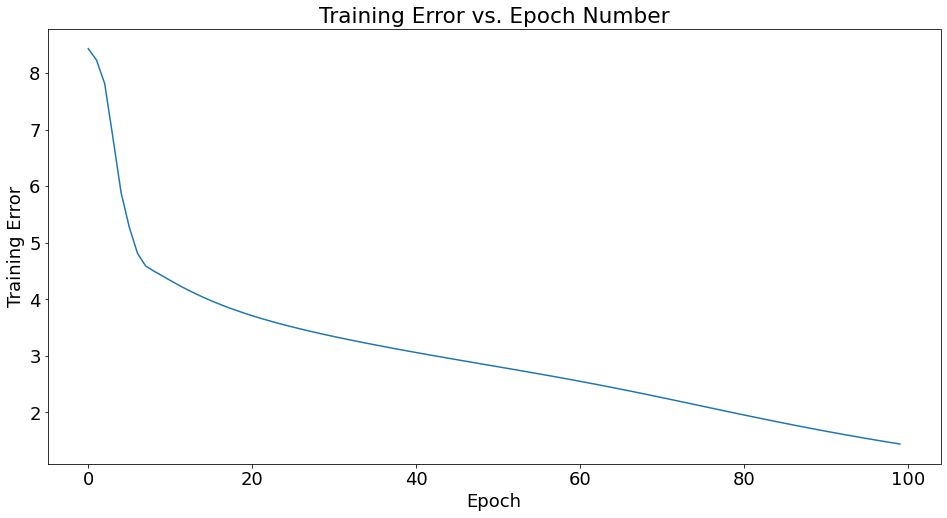

In [202]:
# Plot training error vs. epoch number
plt.rcParams['font.size'] = 18
plt.figure(figsize=(16, 8))
plt.plot(range(num_epochs), errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epoch Number')
# plt.legend(['Train','Validation'], loc = 'upper left')
plt.savefig(f'./Images/PartB_Problem_1_1.pdf', bbox_inches="tight", dpi=300)
plt.show()

In [203]:
Y

array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

### Decision Boundary

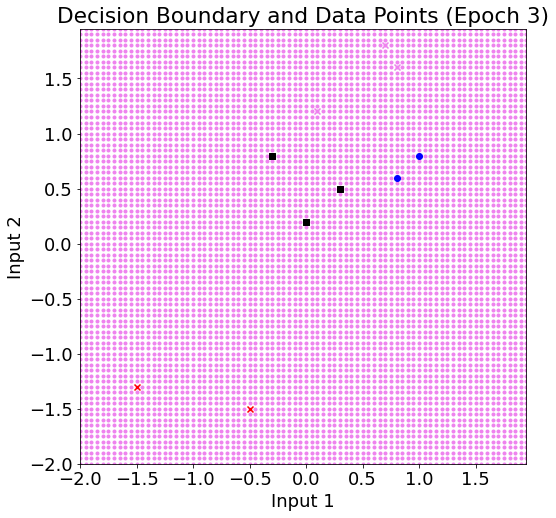

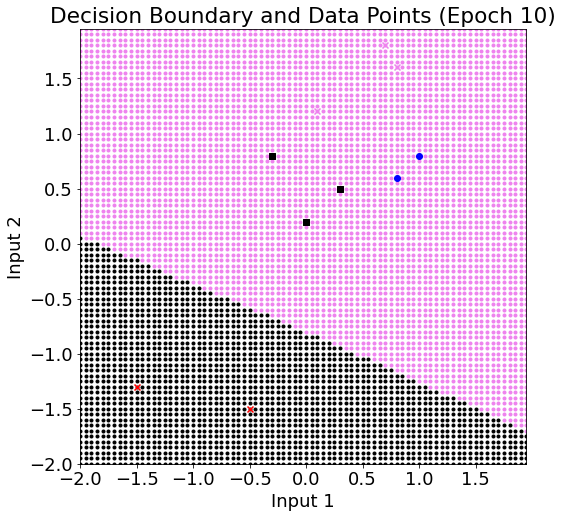

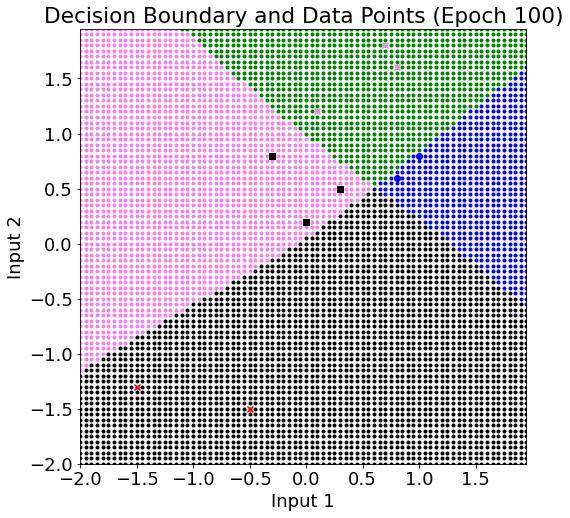

In [204]:
# Define a meshgrid for decision boundary
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
grid = np.c_[xx.ravel(), yy.ravel()]

# Plot decision boundary and data points after 3, 10, and 100 epochs
for epoch in [3, 10, 100]:
    plt.figure(epoch + 2, figsize=(8, 8))
    for i in range(grid.shape[0]):
        # Forward pass for decision boundary
        errors, w_output, b_output, w_hidden, b_hidden  = train(epoch)
        z_hidden = np.dot(w_hidden, grid[i].reshape(-1, 1)) + b_hidden
        a_hidden = sigmoid(z_hidden)
        z_output = np.dot(w_output, a_hidden) + b_output
        a_output = sigmoid(z_output)

        # Color the point based on the output
        if a_output[0] < 0.5 and a_output[1] < 0.5:
            plt.scatter(grid[i, 0], grid[i, 1], c='blue', marker='.')
        elif a_output[0] < 0.5 and a_output[1] >= 0.5:
            plt.scatter(grid[i, 0], grid[i, 1], c='black', marker='.')
        elif a_output[0] >= 0.5 and a_output[1] < 0.5:
            plt.scatter(grid[i, 0], grid[i, 1], c='green', marker='.')
        elif a_output[0] >= 0.5 and a_output[1] >= 0.5:
            plt.scatter(grid[i, 0], grid[i, 1], c='violet', marker='.')

    # Plot data points
    for i in range(X.shape[1]):
        if Y[0, i] == 1 and Y[1, i] == 0:
            plt.scatter(X[0, i], X[1, i], c='brown', marker='x', label='Group 1')
        elif Y[0, i] == 0 and Y[1, i] == 0:
            plt.scatter(X[0, i], X[1, i], c='blue', marker='o', label='Group 2')
        elif Y[0, i] == 1 and Y[1, i] == 1:
            plt.scatter(X[0, i], X[1, i], c='black', marker='s', label='Group 3')
        else:
            plt.scatter(X[0, i], X[1, i], c='red', marker='x', label='Group 4')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title(f'Decision Boundary and Data Points (Epoch {epoch})')
    if epoch == 3: 
        plt.savefig(f'./Images/PartB_Problem_1_2_3.pdf', bbox_inches="tight", dpi=300)
    elif epoch == 10:
        plt.savefig(f'./Images/PartB_Problem_1_2_10.pdf', bbox_inches="tight", dpi=300)
    else:
        plt.savefig(f'./Images/PartB_Problem_1_2_100.pdf', bbox_inches="tight", dpi=300)
        
    # plt.legend()

plt.show()